In [30]:
# Created By Mohsen Naghipourfar

%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../Data/fpkm_normalized.csv', header=None)
labels = pd.read_csv('../Data/disease.csv', header=None)
results = pd.read_csv('../New Results/Results/CSVs/result_200.csv', header=None)
diseases = labels[0].value_counts().index

In [7]:
random_feature_indices = np.random.choice(19671, 50, replace=False)
x_train = data[random_feature_indices]

y_dummies = pd.get_dummies(labels[0])
del y_dummies[y_dummies.columns[-1]]
data_with_categories = pd.concat([x_train, y_dummies], axis=1)

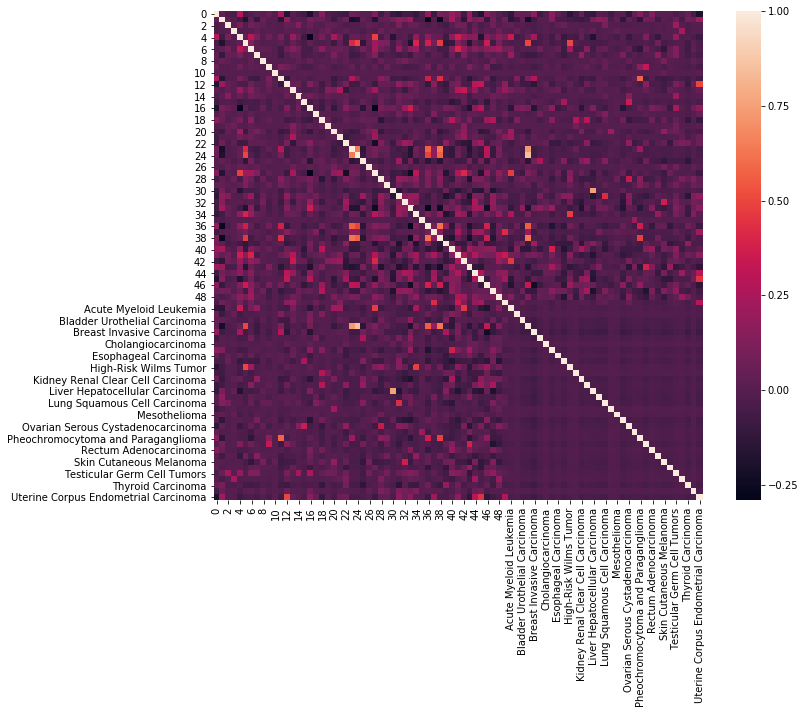

In [8]:
# Pearson Correlation (Which is not good for categorical Data! :)
corr_matrix = data_with_categories.corr()
# correlation_matrix = np.corrcoef(new_data.values)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=1, square=True)
plt.savefig('./heatmap.png')

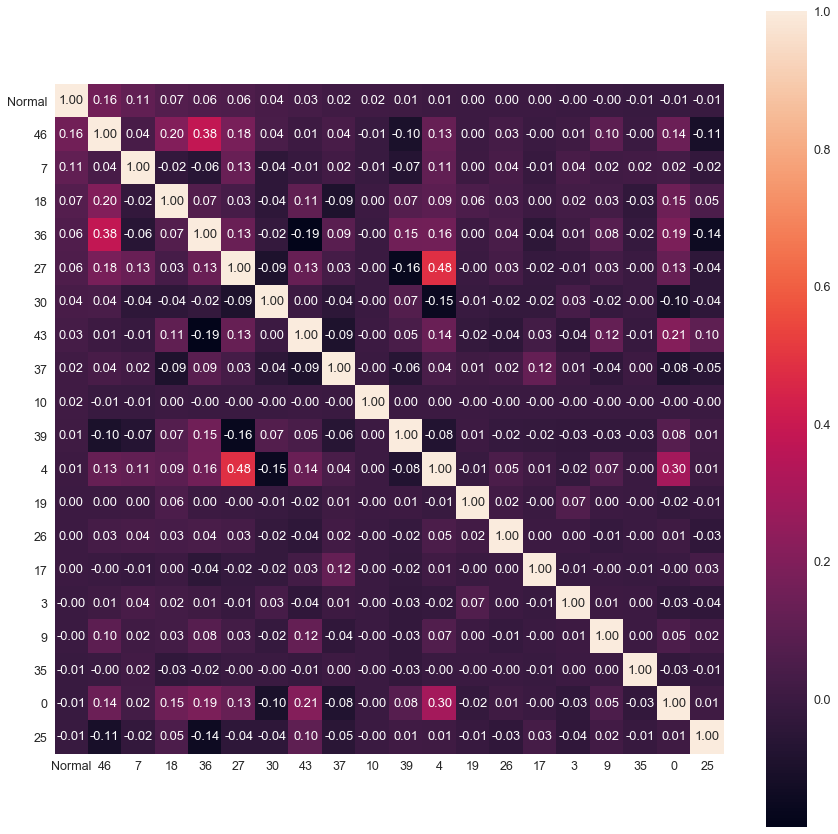

In [39]:
k = 20 # Number of Variables for Heatmap
cols = corr_matrix.nlargest(k, 'Normal')['Normal'].index
# cols = corr_matrix.nlargest(k, '').index
cm = np.corrcoef(data_with_categories[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(15,15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.yticks(rotation=0)
# plt.figure(figsize=(20, 20))
plt.show()


In [33]:
corr_matrix.nlargest(k, 'Normal')

,0,1,2,3,4,5,6,7,8,9,...,Prostate Adenocarcinoma,Rectum Adenocarcinoma,Sarcoma,Skin Cutaneous Melanoma,Stomach Adenocarcinoma,Testicular Germ Cell Tumors,Thymoma,Thyroid Carcinoma,Uterine Carcinosarcoma,Uterine Corpus Endometrial Carcinoma
Normal,-0.006940,-0.124304,-0.020335,-0.000775,0.008786,-0.015393,-0.009935,0.113435,-0.022584,-0.002260,...,-0.054940,-0.030739,-0.039448,-0.052209,-0.047345,-0.030347,-0.026459,-0.055750,-0.018097,-0.057621
46,0.143348,-0.104343,-0.004147,0.012449,0.127224,0.359023,0.152067,0.037819,-0.028113,0.100258,...,0.009128,-0.003992,-0.028500,-0.065637,0.039467,0.103355,-0.016694,0.036318,-0.033469,-0.125758
7,0.023599,-0.106544,0.042517,0.041332,0.111054,0.007924,0.011954,1.000000,-0.006928,0.016000,...,0.006193,0.002235,0.152955,-0.032933,0.041747,0.123088,-0.012104,-0.057924,-0.014937,-0.045942
18,0.145020,0.052814,-0.011814,0.023603,0.094428,-0.026353,0.155754,-0.024480,0.001787,0.025818,...,-0.044358,0.069025,-0.040675,0.057455,-0.032439,0.031861,-0.009368,-0.112422,-0.007817,-0.108061
36,0.185154,-0.262117,-0.032238,0.012010,0.160305,0.372586,0.033190,-0.057880,-0.002151,0.079880,...,-0.022748,-0.105576,0.034619,0.044572,-0.115488,-0.028977,-0.043701,0.070544,0.018305,-0.081647
27,0.126131,-0.168703,0.012132,-0.012577,0.481644,0.210102,0.225914,0.133220,-0.030735,0.027274,...,0.005048,-0.034227,-0.035371,-0.087070,0.063518,-0.016409,-0.023382,-0.018374,-0.011548,-0.087581
30,-0.097830,0.093380,-0.014429,0.033943,-0.150655,-0.044271,-0.053224,-0.037952,0.009716,-0.016271,...,-0.037014,-0.020684,-0.024389,-0.035097,-0.029754,-0.018654,-0.017826,-0.037559,-0.011682,-0.036093
43,0.211374,0.194797,-0.048490,-0.036740,0.138053,-0.163321,0.060360,-0.011557,-0.034932,0.120498,...,0.381579,0.125265,-0.041851,-0.128933,0.201570,-0.117260,-0.065707,-0.012577,-0.056218,-0.128900
37,-0.080218,-0.013337,0.003406,0.006218,0.044891,0.087291,0.002541,0.019913,-0.012039,-0.036448,...,-0.046948,-0.031694,-0.026070,-0.035220,-0.025131,0.023754,-0.011146,-0.053060,0.002463,0.214461
10,-0.003756,-0.004494,-0.001458,-0.000259,0.000433,-0.005311,-0.005988,-0.005346,-0.000852,-0.002493,...,0.000284,-0.002728,0.009501,0.040016,-0.001715,-0.003472,-0.002951,-0.006378,-0.002070,0.011631


In [6]:
# Boxplots: Feature-Label plot

# facet = sns.lmplot(data=data_to_plot, x='x', y='y', hue='label', fit_reg=False, legend=True, legend_out=True)

# for label in labels[0].value_counts().index:

#     for l, row in data_to_plot.loc[data_to_plot['label']==label,:].iterrows():
    
#         #add the data point as text
#         plt.annotate(row['label'], 
#                      (row['x'], row['y']),
#                      horizontalalignment='center',
#                      verticalalignment='center',
#                      size=11) 
# sns.swarmplot(x="x", y="y", data=data_to_plot, linewidth=0.1)
for i in range(x_train.shape[1]):
    data_to_plot = pd.concat([x_train[random_feature_indices[i]], labels], axis=1)
    data_to_plot.columns = ['feature', 'label']
    plt.xticks(rotation=90)
    sns.boxplot(x='label', y='feature', data=data_to_plot)
    plt.ylabel('feature {0}'.format(random_feature_indices[i]))
    plt.savefig('./Plots/box_{0}'.format(random_feature_indices[i]))
    plt.close()